## plot the binary decision surface

In [ ]:
import numpy as np
import pandas as pd

# 先讀 Iris 資料集

df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header= None)

#
# 抓出 2D 特徵 [0,2]
# extract sepalLength@Column[0] and petalLength@Column[2]

X= df[[0,2]].values
print('X= ',X)

# 抓出類別，在 [4]

y= df[4].values
print('y= ',y)

# 文字類別 ('Iris-setosa', 非 'Iris-setosa')
# ==> 數字類別 (+1, -1)

y= np.where(y == 'Iris-setosa', # if
            +1,                 # then
            -1)                 # else
print('y= ',y)

uniqueY= np.unique(y)
print('uniqueY= ', uniqueY)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

markers=  ('x',   'o')
colors=   ('blue','red')
colormap= matplotlib.colors.ListedColormap(colors)
    
#def plot_decision_regions(X, y, classifier= None, resolution= 1):

# 取得 資料集特徵向量 X，以及標籤 y
# X= ... 
# y= ... 

# 先假設 尚無 classifier
classifier= None 

# surface 網格點 (meshGrid) 之解析度
resolution= 1 # .1

# 設定 類別標記 圖示標記 和 顏色 之 對應
# setup marker generator and color map

# 以本題而言，  '-1', '+1' ==> index= [0, 1] ==> ['x', 'o'] ==> ['blue', 'red']
uniqueY= np.unique(y) # == [-1, +1]
# np.unique(y) Returns the sorted unique elements of an array.


# plot samples with labels

for i, lb in enumerate(uniqueY):

    x0= X[y == lb, 0] 
    x1= X[y == lb, 1]

    plt.scatter(x= x0, 
                y= x1, 
                label= lb,
                alpha= .9, 
                c=      colors[i],
                marker= markers[i], 
                edgecolor='black')

#plt.xlim(x0_min, x0_max)
#plt.ylim(x1_min, x1_max)
plt.show()





# plot the decision surface

# 橫坐標 x0, 縱座標 x1 之最大與最小值
x0_min= x1_min =  0
x0_max= x1_max = 10

# x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1



#製造所有範圍內的「網格點」(meshGrid)
xx0, xx1= np.meshgrid(np.arange(x0_min, x0_max, resolution),
                      np.arange(x1_min, x1_max, resolution))

if classifier == None:
    # 沒有 classifier 時， 先用一條不等式來二分全平面 (+1/-1)
    
    z=  xx0.ravel() + xx1.ravel() - 10
    #z= -xx0.ravel() - xx1.ravel() + 10
    
    u= (z<=0) # True/False
    u= u*2-1 # True ==>+1 / False ==> -1
    Z= np.array(u).T
else:
    # 若有 classfier，可用它 對所有網格點做 predict (工程浩大喔！) 
    u= np.array([xx0.ravel(), xx1.ravel()])
    Z= classifier.predict(u).T


Z= Z.reshape(xx0.shape)



# plt.contourf(xx0, xx1, Z, alpha= .1, cmap= colormap)
# plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)



plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)

#plt.xlim(x0_min, x0_max)
#plt.ylim(x1_min, x1_max)
#plt.show()







In [ ]:
#plot_decision_regions(X, y)

In [ ]:
u

In [ ]:
X.shape, y.shape

In [ ]:
# ndarray 拼接方法介绍
# numpy提供了numpy.concatenate((a1,a2,...), axis=0)函数。
# 能够一次完成多个数组的拼接。

ones= np.ones(X.shape[0])

o1= ones.reshape([ones.shape[0],1])
y1= y.reshape([y.shape[0],1])
X1= np.concatenate((o1, X, y1), axis=1)

X1

In [ ]:
xx, yy= np.meshgrid([0,1,2,3,4,5,6,7,8,9,10],[0,1,2,3,4,5,6,7,8,9,10])

i= np.linspace(0,10,101)
j= np.linspace(0,10,101)

xx, yy= np.meshgrid(i, j)

xx.shape, yy.shape

In [ ]:
xx

In [ ]:
yy

In [ ]:
# 給一個不等式
zEq= '(-1) * xx + (-1) * yy + (10) >= 0'
zz= eval(zEq)
#zz

zz= zz.astype(int)  # False --> 0, True --> 1 
#zz

zz= zz*2 - 1  # (0, 1) --> (-1, +1)
zz

In [ ]:


plt.pcolormesh(xx, 
               yy, 
               zz, 
               #cmap= plt.get_cmap('cool'),
               #cmap= plt.get_cmap('coolwarm'), 
               cmap= plt.get_cmap('bwr'), # blue - white - red
               #cmap= plt.get_cmap('Spectral'), # 紅橙黃綠青藍紫
               #cmap= plt.get_cmap('hsv'), # 紅橙黃綠青藍紫紅  (循環)
               alpha= .1)
plt.colorbar()
plt.xlabel('xx')
plt.ylabel('yy')
plt.title(zEq)

#
# https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py
#

plt.scatter(X[y == +1, 0], 
            X[y == +1, 1], 
            c=        'red',
            marker=   'o',
            edgecolor='black')

plt.scatter(X[y == -1, 0], 
            X[y == -1, 1], 
            c=        'blue',
            marker=   'x',
            edgecolor='black')
plt.xlim(0,10)
plt.ylim(0,10)

In [ ]:
plt.scatter(x= X[y==+1, 0], 
            y= X[y==+1, 1], 
            c=  'red')

plt.scatter(x= X[y==-1, 0], 
            y= X[y==-1, 1], 
            c=  'blue')
plt.xlim(0,10)
plt.ylim(0,10)

X=  [[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  

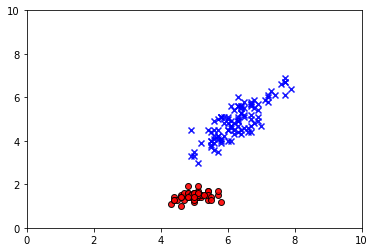

In [2]:
#
# Ch02_00@ryTeach2018
#
# Exercise 01:
#
# 1. 讀進 Iris DataSet
# 2. 依據標籤 作圖
# 3. 運用線性不等式，畫出決策平面
#
# RenyuanLyu@20181001
#


# 取得 資料集特徵向量 X，以及標籤 y
# X= ... 
# y= ... 

import numpy as np
import pandas as pd

# 先讀 Iris 資料集

df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header= None)

#
# 抓出 2D 特徵 [0,2]
# extract sepalLength@Column[0] and petalLength@Column[2]

X= df[[0,2]].values
print('X= ',X)

# 抓出類別，在 [4]

y= df[4].values
print('y= ',y)

# 文字類別 ('Iris-setosa', 非 'Iris-setosa')
# ==> 數字類別 (+1, -1)

y= np.where(y == 'Iris-setosa', # if
            +1,                 # then
            -1)                 # else
print('y= ',y)

uniqueY= np.unique(y)
print('uniqueY= ', uniqueY)

#-------------------
# 作圖
#-------------------

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

# 橫坐標 x0, 縱座標 x1 之最大與最小值
x0_min= x1_min =  0
x0_max= x1_max = 10

# 設定 作圖標記 、 顏色 與 數值(-1,+1)之對映
markers=  ('x',   'o')
colors=   ('blue','red')
colormap= matplotlib.colors.ListedColormap(colors)
    
# plot samples with labels

lb= +1
x0= X[y == lb, 0] 
x1= X[y == lb, 1]

plt.scatter(x= x0, 
            y= x1, 
            label= lb,
            alpha= .9, 
            c=      colors[1],
            marker= markers[1], 
            edgecolor='black')

lb= -1
x0= X[y == lb, 0] 
x1= X[y == lb, 1]

plt.scatter(x= x0, 
            y= x1, 
            label= lb,
            alpha= .9, 
            c=      colors[0],
            marker= markers[0], 
            edgecolor='black')

plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.show()

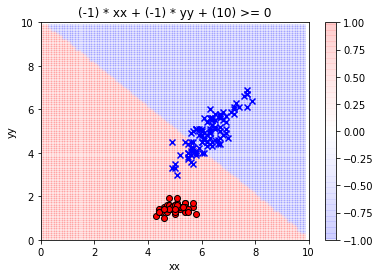

In [3]:
#
# 利用 一個不等式 z(x,y) >= 0
# 畫一個 決策平面
#
    
# surface 網格點 (meshGrid) 之解析度
resolution= .1 # .1

# 設定 類別標記 圖示標記 和 顏色 之 對應
# setup marker generator and color map

# 以本題而言，  '-1', '+1' ==> index= [0, 1] ==> ['x', 'o'] ==> ['blue', 'red']
# uniqueY= np.unique(y) # == [-1, +1]
# np.unique(y) Returns the sorted unique elements of an array.


# plot the decision surface

# 橫坐標 x0, 縱座標 x1 之最大與最小值
x0_min= x1_min =  0
x0_max= x1_max = 10

# x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1



#製造所有範圍內的「網格點」(meshGrid)
#resolution= .1
xx, yy= np.meshgrid(np.arange(x0_min, x0_max, resolution),
                    np.arange(x1_min, x1_max, resolution))

# 給一個不等式
zEq= '(-1) * xx + (-1) * yy + (10) >= 0'
zz= eval(zEq)
#zz

zz= zz.astype(int)  # False --> 0, True --> 1 
#zz

zz= zz*2 - 1  # (0, 1) --> (-1, +1)
#zz

plt.pcolormesh(xx, 
               yy, 
               zz, 
               #cmap= plt.get_cmap('cool'),
               #cmap= plt.get_cmap('coolwarm'), 
               cmap= plt.get_cmap('bwr'), # blue - white - red
               #cmap= plt.get_cmap('Spectral'), # 紅橙黃綠青藍紫
               #cmap= plt.get_cmap('hsv'), # 紅橙黃綠青藍紫紅  (循環)
               alpha= .1)
plt.colorbar()
plt.xlabel('xx')
plt.ylabel('yy')
plt.title(zEq)

#plt.xlim(0,10)
#plt.ylim(0,10)
#plt.show()

#
# https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py
#

#
# 把資料點 依據 標籤，畫在決策平面上
#
plt.scatter(X[y == +1, 0], 
            X[y == +1, 1], 
            c=        'red',
            marker=   'o',
            edgecolor='black')

plt.scatter(X[y == -1, 0], 
            X[y == -1, 1], 
            c=        'blue',
            marker=   'x',
            edgecolor='black')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()


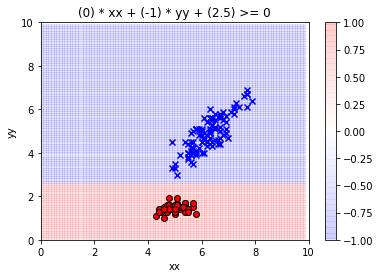

In [5]:
# 給一個不等式
zEq= '(0) * xx + (-1) * yy + (2.5) >= 0'
zz= eval(zEq)
#zz

zz= zz.astype(int)  # False --> 0, True --> 1 
#zz

zz= zz*2 - 1  # (0, 1) --> (-1, +1)
#zz

plt.pcolormesh(xx, 
               yy, 
               zz, 
               #cmap= plt.get_cmap('cool'),
               #cmap= plt.get_cmap('coolwarm'), 
               cmap= plt.get_cmap('bwr'), # blue - white - red
               #cmap= plt.get_cmap('Spectral'), # 紅橙黃綠青藍紫
               #cmap= plt.get_cmap('hsv'), # 紅橙黃綠青藍紫紅  (循環)
               alpha= .1)
plt.colorbar()
plt.xlabel('xx')
plt.ylabel('yy')
plt.title(zEq)

#plt.xlim(0,10)
#plt.ylim(0,10)
#plt.show()

#
# 把資料點 依據 標籤，畫在決策平面上
#
plt.scatter(X[y == +1, 0], 
            X[y == +1, 1], 
            c=        'red',
            marker=   'o',
            edgecolor='black')

plt.scatter(X[y == -1, 0], 
            X[y == -1, 1], 
            c=        'blue',
            marker=   'x',
            edgecolor='black')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
